In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,automation,1,0,1,1,0,1,0
1,airbyte,infrastructure management,0,1,0,0,0,0,0
2,airsonic,media,1,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,1,0,0,1,0
4,nacos,infrastructure management,1,0,0,0,0,0,0


In [3]:
data_with_index = df.set_index("Projects")
data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
data_with_index = data_with_index.drop(columns='JPA')
data_with_index.head()

,Domains,mybatis,jOOQ,Spring,JDBC,Hibernate,EclipseLink
Projects,,,,,,,
Activiti,automation,1,0,1,0,1,0
airbyte,infrastructure management,0,1,0,0,0,0
airsonic,media,1,0,0,0,0,1
spring-cloud-alibaba,infrastructure management,0,0,1,0,1,0
nacos,infrastructure management,1,0,0,0,0,0


In [4]:
data_jpa = df[["Projects", "Domains", "JPA"]].copy()
data_jpa.iloc[: , 1:].sum().sort_values(ascending=False)

<ipython-input-4-23abc903f391>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_jpa.iloc[: , 1:].sum().sort_values(ascending=False)


JPA    68
dtype: int64

In [5]:
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)

mybatis        155
Hibernate       94
Spring          45
EclipseLink     14
jOOQ             7
JDBC             0
dtype: int64

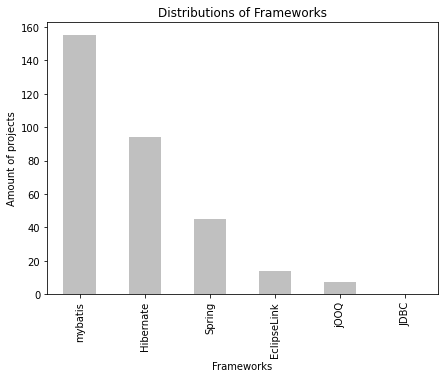

In [6]:
plt.figure(figsize=(7,5))
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Frameworks", color='silver')
plt.xlabel("Frameworks")
plt.ylabel("Amount of projects")
plt.show() 

In [7]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()
#data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
#data_with_index.reset_index(inplace=True)

,Projects,DB-Code(Java),DB-Code(XML),Dependencies,Total-DB,Total-Project,Rate
0,Activiti,77,62,200,339,4890,6.932515
1,che,118,25,282,425,2538,16.745469
2,pinpoint,15,3,17,35,8149,0.429501
3,skywalking,2,3,6,11,2587,0.425203
4,storm,6,1,7,14,3398,0.412007


In [9]:
data_with_index = df.iloc[: , :].sort_values(by='Total-DB', ascending=False)
data_with_index.head()

,Projects,DB-Code(Java),DB-Code(XML),Dependencies,Total-DB,Total-Project,Rate
1,che,118,25,282,425,2538,16.745469
0,Activiti,77,62,200,339,4890,6.932515
2,pinpoint,15,3,17,35,8149,0.429501
4,storm,6,1,7,14,3398,0.412007
3,skywalking,2,3,6,11,2587,0.425203


In [11]:
from apyori import apriori

rules = apriori(data_with_index, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

results = list(rules)
results = pd.DataFrame(results)
results.head(5)

,items,support,ordered_statistics
0,"((, ))",0.285714,"[(((), ()), 1.0, 3.5), (()), ((), 1.0, 3.5)]"
1,"((, C)",0.285714,"[(((), (C), 1.0, 3.5), ((C), ((), 1.0, 3.5)]"
2,"((, J)",0.142857,"[(((), (J), 0.5, 3.5), ((J), ((), 1.0, 3.5)]"
3,"((, L)",0.142857,"[(((), (L), 0.5, 3.5), ((L), ((), 1.0, 3.5)]"
4,"((, M)",0.142857,"[(((), (M), 0.5, 3.5), ((M), ((), 1.0, 3.5)]"


In [12]:
from mlxtend.frequent_patterns import apriori, association_rules

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules[rules['antecedents'] == {'JPA'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
107,(JPA),"(EclipseLink, mybatis, Spring)",0.206687,0.033435,0.030395,0.147059,4.398396,0.023485,1.133215
68,(JPA),"(EclipseLink, Spring)",0.206687,0.033435,0.030395,0.147059,4.398396,0.023485,1.133215
181,(JPA),"(EclipseLink, Hibernate, mybatis, Spring)",0.206687,0.030395,0.027356,0.132353,4.354412,0.021073,1.117511
149,(JPA),"(EclipseLink, Hibernate, Spring)",0.206687,0.030395,0.027356,0.132353,4.354412,0.021073,1.117511
135,(JPA),"(EclipseLink, Hibernate, mybatis)",0.206687,0.036474,0.030395,0.147059,4.031863,0.022856,1.129651
80,(JPA),"(EclipseLink, Hibernate)",0.206687,0.036474,0.030395,0.147059,4.031863,0.022856,1.129651
50,(JPA),"(EclipseLink, mybatis)",0.206687,0.042553,0.033435,0.161765,3.801471,0.024639,1.142217
19,(JPA),(EclipseLink),0.206687,0.042553,0.033435,0.161765,3.801471,0.024639,1.142217
92,(JPA),"(Hibernate, mybatis, Spring)",0.206687,0.079027,0.051672,0.250000,3.163462,0.035338,1.227964
61,(JPA),"(Hibernate, Spring)",0.206687,0.088146,0.054711,0.264706,3.003043,0.036493,1.240122


In [93]:
USAGE_FAN_IN_FILE_PATH = RESOURCE_DIR + os.sep + "usage_fan_in_file.xlsx"
df_usage_fan_in = pd.read_excel(USAGE_FAN_IN_FILE_PATH, engine = 'openpyxl')

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[2]
implementation = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

implementation_usage = pd.merge(implementation, df_usage_fan_in, how = 'inner', on = 'Projects')
implementation_usage = implementation_usage.drop(columns=['Domains', 'DB-Code(Java)', 'DB-Code(XML)', 'Dependencies' ])
implementation_usage.head()

,Projects,EclipseLink,Spring,JDBC,mybatis,Hibernate,jOOQ,JPA,Total-DB,Total-Project,Rate
0,Activiti,NaN,Spring,NaN,mybatis,Hibernate,NaN,JPA,339,4890,6.932515
1,che,EclipseLink,Spring,NaN,mybatis,NaN,NaN,JPA,425,2538,16.745469
2,pinpoint,NaN,Spring,NaN,mybatis,NaN,NaN,NaN,35,8149,0.429501
3,skywalking,NaN,NaN,NaN,NaN,Hibernate,NaN,JPA,11,2587,0.425203
4,storm,NaN,Spring,NaN,mybatis,NaN,jOOQ,NaN,14,3398,0.412007


In [94]:
new_frameworks_matriz = []

frameworks_list = implementation_usage.iloc[: , 2:].values.tolist()

for i in frameworks_list:
    new_frameworks_list = [x for x in i if pd.isnull(x) == False]
    new_frameworks_matriz.append(new_frameworks_list)

print(new_frameworks_matriz)

[['Spring', 'mybatis', 'Hibernate', 'JPA', 339, 4890, 6.932515337423313], ['Spring', 'mybatis', 'JPA', 425, 2538, 16.74546887312845], ['Spring', 'mybatis', 35, 8149, 0.4295005522149957], ['Hibernate', 'JPA', 11, 2587, 0.4252029377657518], ['Spring', 'mybatis', 'jOOQ', 14, 3398, 0.4120070629782225]]


TypeError: cannot perform reduce with flexible type

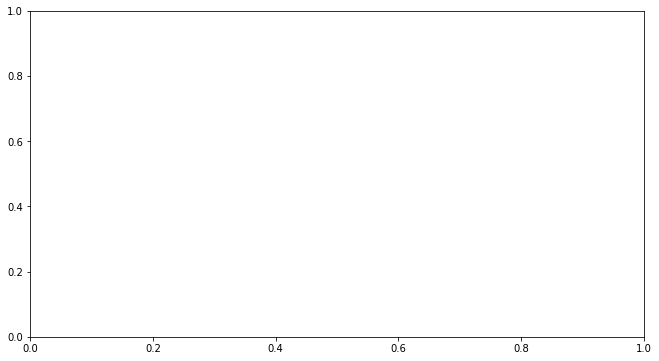

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize =(11, 6))

bplots = plt.boxplot(new_frameworks_matriz,  vert = 0, patch_artist = False)
plt.title("Boxplot da base de dados Íris", loc="center", fontsize=18)
plt.xlabel("Tipos de Flores")
plt.ylabel("Comprimento das sépalas")

plt.show()
